<a href="https://colab.research.google.com/github/Jguaquez/red-neuronal-convolucional-para-im-genes-histol-gicas/blob/main/ResNetCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 4 not upgraded.
Need to get 104 kB of archives.
After this operation, 297 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libopenslide0 amd64 3.4.1+dfsg-5build1 [89.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 openslide-tools amd64 3.4.1+dfsg-5build1 [13.8 kB]
Fetched 104 kB in 1s (128 kB/s)
Selecting previously unselected package libopenslide0.
(Reading database ... 119602 files and directories currently installed.)
Preparing to unpack .../libopenslide0_3.4.1+dfsg-5build1_amd64.deb ...
Unpacking libopenslide0 (3.4.1+dfsg-5build1) ...
Selecting previously unselected package openslide-tools.


In [ ]:
from google.colab import files
import cv2
import numpy as np
from PIL import Image
import os

In [ ]:
# Función para normalizar una imagen utilizando histogram normalization
def histogram_normalization(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_channel = clahe.apply(l_channel)
    processed_image = cv2.merge((l_channel, a_channel, b_channel))
    processed_image = cv2.cvtColor(processed_image, cv2.COLOR_LAB2RGB)
    return processed_image

# Definir las etiquetas
etiquetas = ['tejido_normal', 'tejido_benigno', 'in_situ', 'carcinoma_invasivo']

# Diccionario para mapear etiquetas a índices
label_to_index = {
    'tejido_normal': 0,
    'tejido_benigno': 1,
    'in_situ': 2,
    'carcinoma_invasivo': 3
}

# Lista para almacenar imágenes y etiquetas
X = []
y = []

# Cargar imágenes y asignar etiquetas
for etiqueta in etiquetas:
    print(f"Por favor, selecciona las imágenes para la etiqueta {etiqueta}:")
    archivos_cargados = files.upload()

    for nombre_archivo, contenido_archivo in archivos_cargados.items():
        # Guardar la imagen temporalmente
        with open(nombre_archivo, 'wb') as f:
            f.write(contenido_archivo)

        # Leer la imagen PNG
        imagen_original = cv2.imread(nombre_archivo)
        imagen_original = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB)  # Convertir a RGB

        # Normalizar la imagen
        imagen_normalizada = histogram_normalization(imagen_original)

        # Agregar la imagen normalizada y la etiqueta correspondiente a las listas
        X.append(imagen_normalizada)
        y.append(label_to_index[etiqueta])

        # Eliminar la imagen temporal y el archivo PNG
        os.remove(nombre_archivo)

# Convertir listas a arrays numpy
X = np.array(X)
y = np.array(y)

Por favor, selecciona las imágenes para la etiqueta tejido_normal:


Saving n001.png to n001.png
Saving n002.png to n002.png
Saving n003.png to n003.png
Saving n004.png to n004.png
Saving n005.png to n005.png
Saving n006.png to n006.png
Saving n007.png to n007.png
Saving n008.png to n008.png
Saving n009.png to n009.png
Saving n010.png to n010.png
Saving n011.png to n011.png
Saving n012.png to n012.png
Saving n013.png to n013.png
Saving n014.png to n014.png
Saving n015.png to n015.png
Saving n016.png to n016.png
Saving n017.png to n017.png
Saving n018.png to n018.png
Saving n019.png to n019.png
Saving n020.png to n020.png
Saving n021.png to n021.png
Saving n022.png to n022.png
Saving n023.png to n023.png
Saving n024.png to n024.png
Saving n025.png to n025.png
Saving n026.png to n026.png
Saving n027.png to n027.png
Saving n028.png to n028.png
Saving n029.png to n029.png
Saving n030.png to n030.png
Por favor, selecciona las imágenes para la etiqueta tejido_benigno:


Saving b001.png to b001.png
Saving b002.png to b002.png
Saving b003.png to b003.png
Saving b004.png to b004.png
Saving b005.png to b005.png
Saving b006.png to b006.png
Saving b007.png to b007.png
Saving b008.png to b008.png
Saving b009.png to b009.png
Saving b010.png to b010.png
Saving b011.png to b011.png
Saving b012.png to b012.png
Saving b013.png to b013.png
Saving b014.png to b014.png
Saving b015.png to b015.png
Saving b016.png to b016.png
Saving b017.png to b017.png
Saving b018.png to b018.png
Saving b019.png to b019.png
Saving b020.png to b020.png
Saving b021.png to b021.png
Saving b022.png to b022.png
Saving b023.png to b023.png
Saving b024.png to b024.png
Saving b025.png to b025.png
Saving b026.png to b026.png
Saving b027.png to b027.png
Saving b028.png to b028.png
Saving b029.png to b029.png
Saving b030.png to b030.png
Por favor, selecciona las imágenes para la etiqueta in_situ:


Saving is001.png to is001.png
Saving is002.png to is002.png
Saving is003.png to is003.png
Saving is004.png to is004.png
Saving is005.png to is005.png
Saving is006.png to is006.png
Saving is007.png to is007.png
Saving is008.png to is008.png
Saving is009.png to is009.png
Saving is010.png to is010.png
Saving is011.png to is011.png
Saving is012.png to is012.png
Saving is013.png to is013.png
Saving is014.png to is014.png
Saving is015.png to is015.png
Saving is016.png to is016.png
Saving is017.png to is017.png
Saving is018.png to is018.png
Saving is019.png to is019.png
Saving is020.png to is020.png
Saving is021.png to is021.png
Saving is022.png to is022.png
Saving is023.png to is023.png
Saving is024.png to is024.png
Saving is025.png to is025.png
Saving is026.png to is026.png
Saving is027.png to is027.png
Saving is028.png to is028.png
Saving is029.png to is029.png
Saving is030.png to is030.png
Por favor, selecciona las imágenes para la etiqueta carcinoma_invasivo:


Saving iv001.png to iv001.png
Saving iv002.png to iv002.png
Saving iv003.png to iv003.png
Saving iv004.png to iv004.png
Saving iv005.png to iv005.png
Saving iv006.png to iv006.png
Saving iv007.png to iv007.png
Saving iv008.png to iv008.png
Saving iv009.png to iv009.png
Saving iv010.png to iv010.png
Saving iv011.png to iv011.png
Saving iv012.png to iv012.png
Saving iv013.png to iv013.png
Saving iv014.png to iv014.png
Saving iv015.png to iv015.png
Saving iv016.png to iv016.png
Saving iv017.png to iv017.png
Saving iv018.png to iv018.png
Saving iv019.png to iv019.png
Saving iv020.png to iv020.png
Saving iv021.png to iv021.png
Saving iv022.png to iv022.png
Saving iv023.png to iv023.png
Saving iv024.png to iv024.png
Saving iv025.png to iv025.png
Saving iv026.png to iv026.png
Saving iv027.png to iv027.png
Saving iv028.png to iv028.png
Saving iv029.png to iv029.png
Saving iv030.png to iv030.png


Imagen para la etiqueta 'tejido_normal':


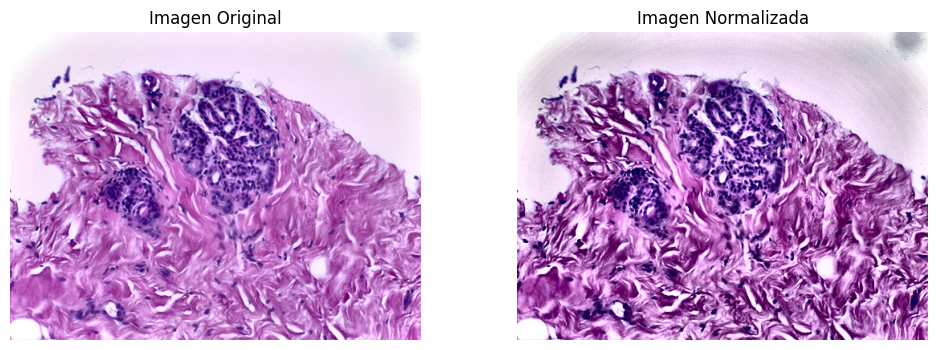

Imagen para la etiqueta 'tejido_benigno':


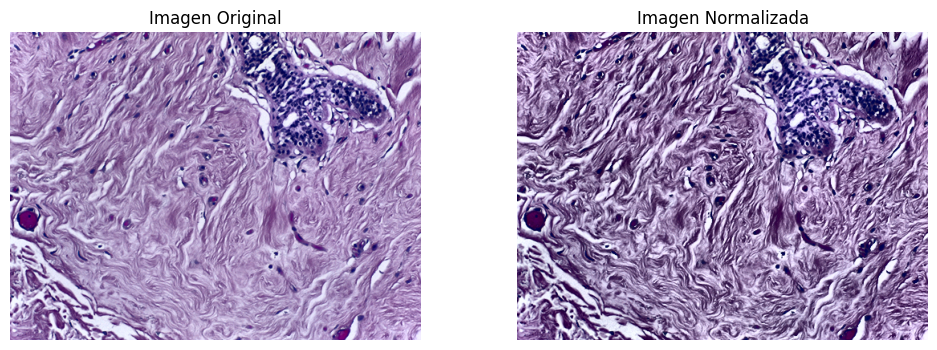

Imagen para la etiqueta 'in_situ':


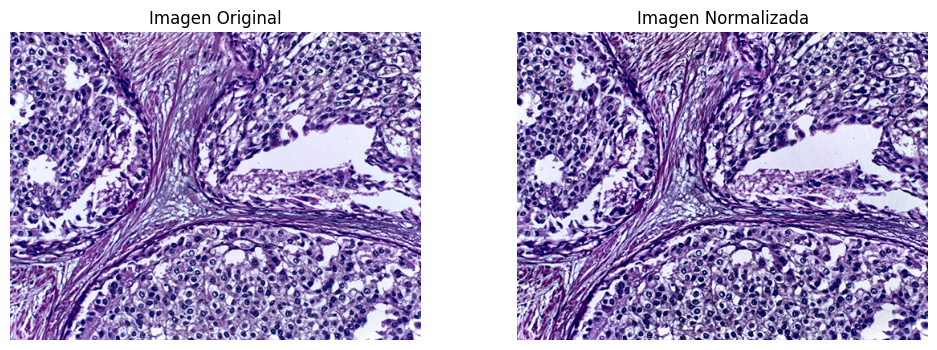

Imagen para la etiqueta 'carcinoma_invasivo':


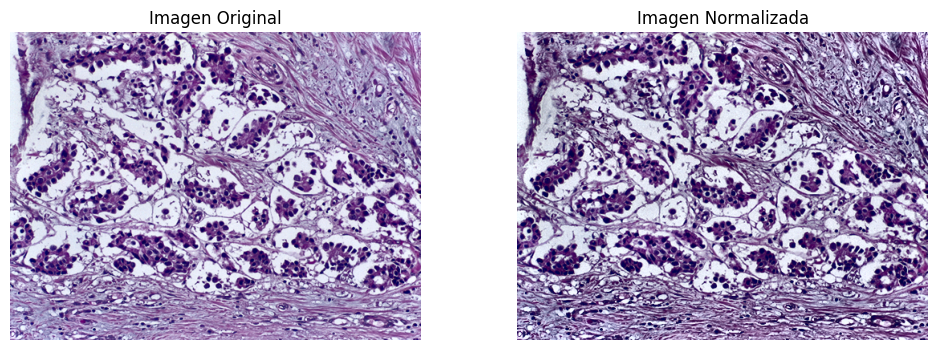

In [ ]:
import matplotlib.pyplot as plt

# Función para mostrar una imagen original y una imagen normalizada
def mostrar_imagenes(etiqueta):
    # Buscar el índice de la primera imagen con la etiqueta dada
    indice_etiqueta = next(i for i, y_etiqueta in enumerate(y) if y_etiqueta == etiqueta)

    # Obtener la imagen original y la imagen normalizada
    imagen_original = X[indice_etiqueta]
    imagen_normalizada = histogram_normalization(imagen_original)

    # Mostrar las imágenes
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    axs[0].imshow(imagen_original)
    axs[0].set_title("Imagen Original")
    axs[0].axis('off')
    axs[1].imshow(imagen_normalizada)
    axs[1].set_title("Imagen Normalizada")
    axs[1].axis('off')
    plt.show()

# Mostrar una imagen para cada etiqueta
for etiqueta in etiquetas:
    print(f"Imagen para la etiqueta '{etiqueta}':")
    mostrar_imagenes(label_to_index[etiqueta])

In [ ]:
# Tamaño del conjunto de imágenes
tamano_imagenes = X.shape
print("Tamaño del conjunto de imágenes:", tamano_imagenes)

# Tamaño del conjunto de etiquetas
tamano_etiquetas = y.shape
print("Tamaño del conjunto de etiquetas:", tamano_etiquetas)

# Cantidad única de etiquetas
cantidad_etiquetas_unicas = len(np.unique(y))
print("Cantidad única de etiquetas:", cantidad_etiquetas_unicas)

Tamaño del conjunto de imágenes: (120, 384, 512, 3)
Tamaño del conjunto de etiquetas: (120,)
Cantidad única de etiquetas: 4


modelo combinado

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode de las etiquetas
num_classes = len(etiquetas)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Cargar la arquitectura ResNet50 preentrenada, sin incluir las capas de salida (top=False)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(384, 512, 3))

# Congelar las capas del modelo base para que no se actualicen durante el entrenamiento
base_model.trainable = False

# Añadir capas adicionales del segundo modelo
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)


# Ajustar las capas convolucionales y de pooling para evitar tamaños de salida negativos
x = Conv2D(32, (1, 1), activation='relu')(x)  # Reducir el tamaño del kernel
x = MaxPooling2D((1, 1))(x)

#x = Flatten()(x)
x = GlobalAveragePooling2D()(x)
x = Dense(8, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Guardar el modelo
model.save('CancerMama.h5')

files.download('CancerMama.h5')


# Resumen del modelo
model.summary()

Epoch 1/100
3/3 [==============================] - 13s 4s/step - loss: 3.8074 - accuracy: 0.2812 - val_loss: 1.6699 - val_accuracy: 0.2917
Epoch 2/100
3/3 [==============================] - 8s 3s/step - loss: 1.6346 - accuracy: 0.2708 - val_loss: 1.3439 - val_accuracy: 0.2500
Epoch 3/100
3/3 [==============================] - 8s 3s/step - loss: 1.3496 - accuracy: 0.2917 - val_loss: 1.2948 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 8s 3s/step - loss: 1.2574 - accuracy: 0.3958 - val_loss: 1.2606 - val_accuracy: 0.5417
Epoch 5/100
3/3 [==============================] - 8s 3s/step - loss: 1.2346 - accuracy: 0.3542 - val_loss: 1.2257 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 8s 3s/step - loss: 1.2121 - accuracy: 0.3750 - val_loss: 1.2155 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 8s 3s/step - loss: 1.2459 - accuracy: 0.3958 - val_loss: 1.2330 - val_accuracy: 0.5417
Epoch 8/100
3/3 [================

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 384, 512, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 390, 518, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 192, 256, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 192, 256, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

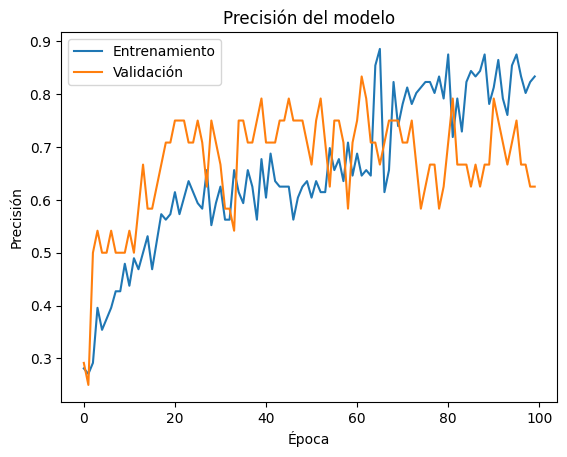

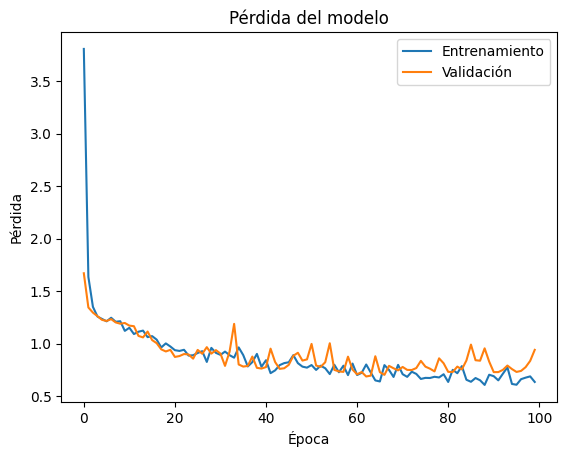

In [ ]:
import matplotlib.pyplot as plt

# Graficar precisión (accuracy)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='best')
plt.show()

# Graficar pérdida (loss)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Predecir las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Generar un informe de clasificación
report = classification_report(y_true, y_pred_classes, target_names=etiquetas)
print(report)

1/1 [==============================] - 3s 3s/step
                    precision    recall  f1-score   support

     tejido_normal       1.00      0.33      0.50         6
    tejido_benigno       0.55      0.86      0.67         7
           in_situ       0.67      0.86      0.75         7
carcinoma_invasivo       0.50      0.25      0.33         4

          accuracy                           0.62        24
         macro avg       0.68      0.57      0.56        24
      weighted avg       0.69      0.62      0.59        24



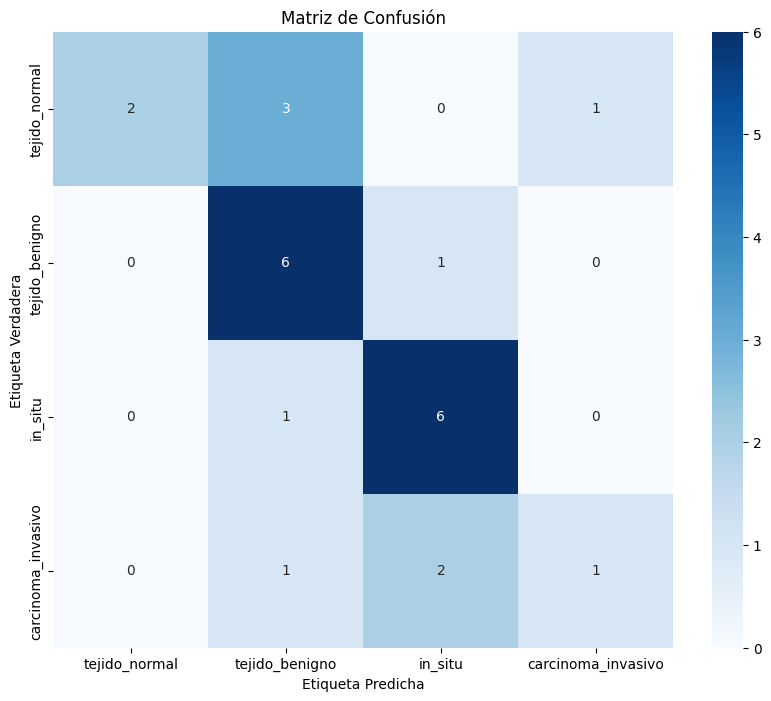

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import load_model

# Función para cargar el modelo entrenado
def cargar_modelo_entrenado(ruta_modelo):
    return load_model(ruta_modelo)

# Ruta donde se encuentra el modelo entrenado
ruta_modelo_entrenado = 'CancerMama.h5'

# Cargar el modelo entrenado
modelo_red_neuronal = cargar_modelo_entrenado(ruta_modelo_entrenado)

# Función para normalizar una imagen utilizando histogram normalization
def histogram_normalization(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_channel = clahe.apply(l_channel)
    processed_image = cv2.merge((l_channel, a_channel, b_channel))
    processed_image = cv2.cvtColor(processed_image, cv2.COLOR_LAB2RGB)
    return processed_image

# Función para ajustar la resolución de una imagen
def ajustar_resolucion(image, nueva_ancho, nueva_alto):
    return cv2.resize(image, (nueva_ancho, nueva_alto), interpolation=cv2.INTER_AREA)

# Definir las etiquetas
etiquetas = ['tejido_normal', 'tejido_benigno', 'in_situ', 'carcinoma_invasivo']

# Función para cargar y preprocesar una imagen de parche
def cargar_y_preprocesar_imagen(ruta_imagen):
    # Cargar la imagen
    imagen_original = Image.open(ruta_imagen)
    imagen_rgb = cv2.cvtColor(np.array(imagen_original), cv2.COLOR_RGBA2RGB)

    # Ajustar la resolución de la imagen
    nueva_ancho, nueva_alto = 512, 384  # Resolución utilizada en el entrenamiento
    imagen_redimensionada = ajustar_resolucion(imagen_rgb, nueva_ancho, nueva_alto)

    # Normalizar la imagen
    imagen_normalizada = histogram_normalization(imagen_redimensionada)

    # Asegurarse de que la imagen esté en el formato adecuado
    imagen_final = np.expand_dims(imagen_normalizada, axis=0)  # Añadir dimensión para batch

    return imagen_final

# Subir una nueva imagen de parche
print("Por favor, selecciona la imagen de parche:")
archivo_cargado = files.upload()

# Procesar la nueva imagen de parche
nombre_archivo, contenido_archivo = list(archivo_cargado.items())[0]
ruta_imagen = nombre_archivo
imagen_preprocesada = cargar_y_preprocesar_imagen(ruta_imagen)

# Realizar la predicción con el modelo de red neuronal
prediccion = modelo_red_neuronal.predict(imagen_preprocesada)

# Imprimir la predicción
etiqueta_predicha = etiquetas[np.argmax(prediccion)]
print(f"La imagen {ruta_imagen} se clasifica como: {etiqueta_predicha}")

Por favor, selecciona la imagen de parche:
